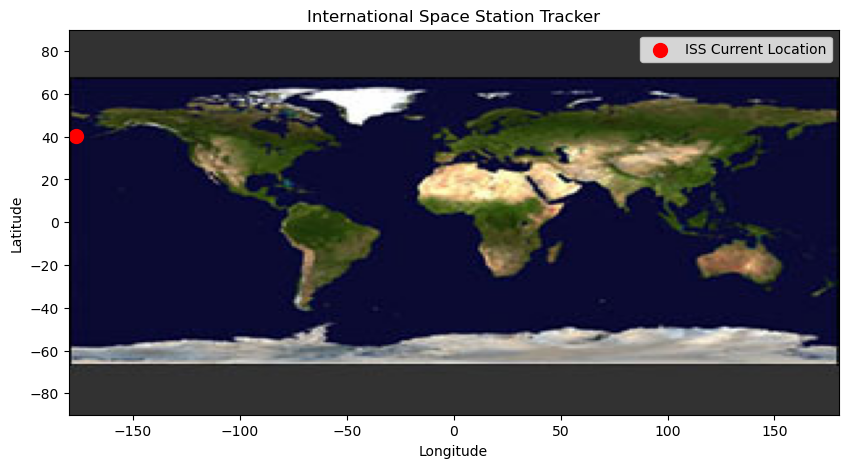

In [9]:
import json
import requests
import matplotlib.pyplot as plt
import time

def get_iss_location():
    try:
        response = requests.get('http://api.open-notify.org/iss-now.json')
        response.raise_for_status()
        data = response.json()
        longitude = float(data['iss_position']['longitude'])
        latitude = float(data['iss_position']['latitude'])
        return longitude, latitude
    except (requests.exceptions.RequestException, json.JSONDecodeError) as e:
        print('Error retrieving ISS location:', str(e))
        return None

def plot_iss_location(longitude, latitude, map_image):
    plt.figure(figsize=(10, 5))
    world_map = plt.imread(map_image)
    plt.imshow(world_map, extent=[-180, 180, -90, 90])
    plt.scatter(longitude, latitude, color='red', s=100, label='ISS Current Location')
    plt.title('International Space Station Tracker')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()

# Set the interval in seconds
interval = 10
# Set the maximum number of iterations
max_iterations = 1

iteration = 0
while iteration < max_iterations:
    # Get ISS location
    location = get_iss_location()
    if location:
        longitude, latitude = location

        # Plot ISS location on map
        map_image = 'world_map.jpg'
        plot_iss_location(longitude, latitude, map_image)
    
    # Increment the iteration counter
    iteration += 1
    
    # Sleep for the specified interval
    time.sleep(interval)
